In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import datetime
import random

In [2]:
monday_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/data/monday.csv",  sep=';', parse_dates=['timestamp'])

In [3]:
tuesday_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/data/tuesday.csv", sep=';', parse_dates=['timestamp'])

In [4]:
wednesday_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/data/wednesday.csv", sep=';', parse_dates=['timestamp'])

In [5]:
thursday_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/data/thursday.csv", sep=';', parse_dates=['timestamp'])

In [6]:
friday_data = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/data/friday.csv", sep=';', parse_dates=['timestamp'])

In [7]:
monday_data.head(5)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [8]:
monday_data.dtypes

timestamp      datetime64[ns]
customer_no             int64
location               object
dtype: object

In [9]:
monday_data.isna().sum()

timestamp      0
customer_no    0
location       0
dtype: int64

In [10]:
def create_day_column(df):
    df['day']=df['timestamp'].dt.dayofweek
    return df

In [11]:
days_data = [monday_data,tuesday_data,wednesday_data,thursday_data,friday_data]

In [12]:
def name_dayofweek(df):
    dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    df['weekday'] = df['timestamp'].dt.dayofweek.map(dayOfWeek)
    return df

In [13]:
for count, day in enumerate(days_data):
    df = day
    name_dayofweek(day)
    create_day_column(day)
    day['customer_no']=day['customer_no'] + count*2000

In [14]:
data = pd.concat(days_data)

In [15]:
data

,timestamp,customer_no,location,weekday,day
0,2019-09-02 07:03:00,1,dairy,Monday,0
1,2019-09-02 07:03:00,2,dairy,Monday,0
2,2019-09-02 07:04:00,3,dairy,Monday,0
3,2019-09-02 07:04:00,4,dairy,Monday,0
4,2019-09-02 07:04:00,5,spices,Monday,0
...,...,...,...,...,...
5120,2019-09-06 21:50:00,9500,dairy,Friday,4
5121,2019-09-06 21:50:00,9507,checkout,Friday,4
5122,2019-09-06 21:50:00,9508,checkout,Friday,4
5123,2019-09-06 21:50:00,9509,drinks,Friday,4


In [16]:
#customers


### Calculate the total number of customers in each section

In [17]:
data.value_counts('location')

location
checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
dtype: int64

<AxesSubplot:xlabel='location'>

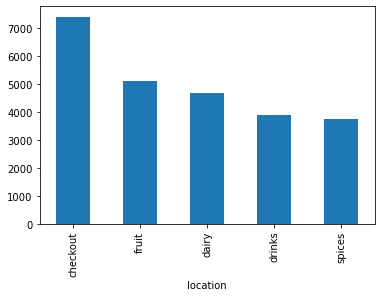

In [18]:
data.value_counts('location').plot(kind="bar")

### Calculate the total number of customers in each section over time

In [19]:
data['hour'] = data['timestamp'].dt.hour
data['time'] = data['timestamp'].dt.time
data['date'] = data['timestamp'].dt.date

In [20]:
#try_df = data.sort_values(by=['time']).groupby(['location','time'])['customer_id'].agg(['count'])
try_df = data.groupby(['location', 'hour'])['customer_no'].nunique().reset_index()

In [21]:
selected_hour_df = try_df[try_df.loc[:,'location']!='checkout']

In [22]:
selected_hour_df.head(2)

,location,hour,customer_no
15,dairy,7,235
16,dairy,8,374


<AxesSubplot:xlabel='hour', ylabel='customer_no'>

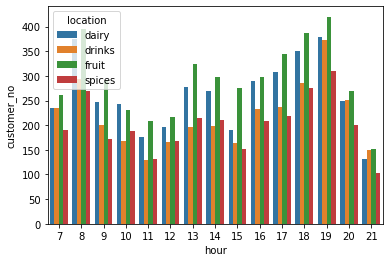

In [23]:
sns.barplot(data=selected_hour_df, x = 'hour', y = 'customer_no', hue = 'location')

### Display the number of customers at checkout over time

In [24]:
checkout_df = try_df[try_df.loc[:,'location']=='checkout']

In [25]:
checkout_df.head(4)

,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427


<AxesSubplot:xlabel='hour', ylabel='customer_no'>

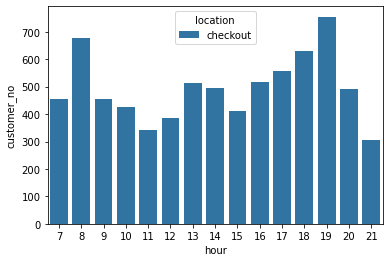

In [26]:
sns.barplot(data=checkout_df, x = 'hour', y = 'customer_no', hue = 'location')

### Calculate the time each customer spent in the market

In [27]:
data.groupby('location')['customer_no'].nunique()

location
checkout    7417
dairy       3818
drinks      3214
fruit       4284
spices      2938
Name: customer_no, dtype: int64

In [28]:
df_entryexit = data.groupby(['date','customer_no', 'location','time'])['hour'].nunique().reset_index()

In [29]:
df_entryexit[df_entryexit["location"]=='checkout']

,date,customer_no,location,time,hour
0,2019-09-02,1,checkout,07:05:00,1
2,2019-09-02,2,checkout,07:06:00,1
4,2019-09-02,3,checkout,07:06:00,1
6,2019-09-02,4,checkout,07:08:00,1
8,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
24860,2019-09-06,9501,checkout,21:48:00,1
24862,2019-09-06,9502,checkout,21:47:00,1
24866,2019-09-06,9504,checkout,21:48:00,1
24871,2019-09-06,9507,checkout,21:50:00,1


In [30]:
df_entryexit[df_entryexit["location"]!='checkout']

,date,customer_no,location,time,hour
1,2019-09-02,1,dairy,07:03:00,1
3,2019-09-02,2,dairy,07:03:00,1
5,2019-09-02,3,dairy,07:04:00,1
7,2019-09-02,4,dairy,07:04:00,1
9,2019-09-02,5,spices,07:04:00,1
...,...,...,...,...,...
24870,2019-09-06,9506,dairy,21:48:00,1
24872,2019-09-06,9507,dairy,21:48:00,1
24874,2019-09-06,9508,dairy,21:48:00,1
24875,2019-09-06,9509,drinks,21:50:00,1


In [31]:
df_entryexit.groupby(['date','customer_no'], as_index=False).nth[:-1]

,date,customer_no,location,time,hour
0,2019-09-02,1,checkout,07:05:00,1
2,2019-09-02,2,checkout,07:06:00,1
4,2019-09-02,3,checkout,07:06:00,1
6,2019-09-02,4,checkout,07:08:00,1
8,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
24864,2019-09-06,9503,dairy,21:47:00,1
24866,2019-09-06,9504,checkout,21:48:00,1
24868,2019-09-06,9505,dairy,21:49:00,1
24871,2019-09-06,9507,checkout,21:50:00,1


In [32]:
df_entryexit.shape

(24877, 5)

In [33]:
entry_df = df_entryexit.sort_values(['customer_no','time']).groupby(['date','customer_no']).nth[:1]
entry_df.rename(columns = {'time':'entry_time','location':'first_location'}, inplace = True)

entry_df.reset_index(inplace=True)

In [34]:
df_checkout = df_entryexit.sort_values(['customer_no','time']).groupby(['date','customer_no']).nth(-1)
df_checkout.reset_index(inplace=True)
df_checkout

,date,customer_no,location,time,hour
0,2019-09-02,1,checkout,07:05:00,1
1,2019-09-02,2,checkout,07:06:00,1
2,2019-09-02,3,checkout,07:06:00,1
3,2019-09-02,4,checkout,07:08:00,1
4,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
7440,2019-09-06,9506,dairy,21:48:00,1
7441,2019-09-06,9507,checkout,21:50:00,1
7442,2019-09-06,9508,checkout,21:50:00,1
7443,2019-09-06,9509,drinks,21:50:00,1


In [35]:
df_checkout

,date,customer_no,location,time,hour
0,2019-09-02,1,checkout,07:05:00,1
1,2019-09-02,2,checkout,07:06:00,1
2,2019-09-02,3,checkout,07:06:00,1
3,2019-09-02,4,checkout,07:08:00,1
4,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
7440,2019-09-06,9506,dairy,21:48:00,1
7441,2019-09-06,9507,checkout,21:50:00,1
7442,2019-09-06,9508,checkout,21:50:00,1
7443,2019-09-06,9509,drinks,21:50:00,1


In [36]:
df_checkout.rename(columns = {'time':'checkout_time'}, inplace = True)
df_checkout

,date,customer_no,location,checkout_time,hour
0,2019-09-02,1,checkout,07:05:00,1
1,2019-09-02,2,checkout,07:06:00,1
2,2019-09-02,3,checkout,07:06:00,1
3,2019-09-02,4,checkout,07:08:00,1
4,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
7440,2019-09-06,9506,dairy,21:48:00,1
7441,2019-09-06,9507,checkout,21:50:00,1
7442,2019-09-06,9508,checkout,21:50:00,1
7443,2019-09-06,9509,drinks,21:50:00,1


In [37]:
# convert checkout time from object type to datetime64[ns]
print(df_checkout['checkout_time'].dtypes)
df_checkout['checkout_time'] = pd.to_datetime(df_checkout['checkout_time'], format='%H:%M:%S')
print(df_checkout['checkout_time'].dtypes)

object
datetime64[ns]


In [38]:
df_checkout['checkout_time'] = df_checkout['checkout_time'].dt.time
df_checkout

,date,customer_no,location,checkout_time,hour
0,2019-09-02,1,checkout,07:05:00,1
1,2019-09-02,2,checkout,07:06:00,1
2,2019-09-02,3,checkout,07:06:00,1
3,2019-09-02,4,checkout,07:08:00,1
4,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
7440,2019-09-06,9506,dairy,21:48:00,1
7441,2019-09-06,9507,checkout,21:50:00,1
7442,2019-09-06,9508,checkout,21:50:00,1
7443,2019-09-06,9509,drinks,21:50:00,1


In [39]:
#final_checkout_time = pd.to_datetime('21:59:59', format='%H:%M:%S')
import datetime
final_checkout_time = datetime.time(21,50,00)

In [40]:
df_checkout.loc[:,'checkout_time'][df_checkout['location'] != 'checkout'] = final_checkout_time
df_checkout.loc[:,'location'][df_checkout['location'] != 'checkout'] = 'checkout'
df_checkout

/tmp/ipykernel_71150/436262335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout.loc[:,'checkout_time'][df_checkout['location'] != 'checkout'] = final_checkout_time
/tmp/ipykernel_71150/436262335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout.loc[:,'location'][df_checkout['location'] != 'checkout'] = 'checkout'


,date,customer_no,location,checkout_time,hour
0,2019-09-02,1,checkout,07:05:00,1
1,2019-09-02,2,checkout,07:06:00,1
2,2019-09-02,3,checkout,07:06:00,1
3,2019-09-02,4,checkout,07:08:00,1
4,2019-09-02,5,checkout,07:05:00,1
...,...,...,...,...,...
7440,2019-09-06,9506,checkout,21:50:00,1
7441,2019-09-06,9507,checkout,21:50:00,1
7442,2019-09-06,9508,checkout,21:50:00,1
7443,2019-09-06,9509,checkout,21:50:00,1


In [41]:
df_checkout.shape

(7445, 5)

In [42]:
entry_df.shape

(7445, 5)

In [43]:
# now combine entry_df and df_checkout together
combined_df = pd.concat([entry_df, df_checkout], axis=1)
combined_df.drop(['hour','hour'],axis=1)
cols = ['date','customer_no','first_location','location','entry_time','checkout_time']
combined_df = combined_df[cols]
combined_df
# Drop duplicate columns
combined_df = combined_df.T.drop_duplicates().T
combined_df

,date,customer_no,first_location,location,entry_time,checkout_time
0,2019-09-02,1,dairy,checkout,07:03:00,07:05:00
1,2019-09-02,2,dairy,checkout,07:03:00,07:06:00
2,2019-09-02,3,dairy,checkout,07:04:00,07:06:00
3,2019-09-02,4,dairy,checkout,07:04:00,07:08:00
4,2019-09-02,5,spices,checkout,07:04:00,07:05:00
...,...,...,...,...,...,...
7440,2019-09-06,9506,dairy,checkout,21:48:00,21:50:00
7441,2019-09-06,9507,dairy,checkout,21:48:00,21:50:00
7442,2019-09-06,9508,dairy,checkout,21:48:00,21:50:00
7443,2019-09-06,9509,drinks,checkout,21:50:00,21:50:00


In [44]:
## create a dataframe with current location column and combine with the above df

### Calculate the time each customer spent in the market

In [45]:
combined_df['checkout_time'] = pd.to_datetime(combined_df['checkout_time'], format='%H:%M:%S')
combined_df['entry_time'] = pd.to_datetime(combined_df['entry_time'], format='%H:%M:%S')

In [46]:
combined_df['checkout_time'].dtypes
combined_df['entry_time'].dtypes

dtype('<M8[ns]')

In [47]:
combined_df['time_spent'] = round(((combined_df['checkout_time'] - combined_df['entry_time']).dt.total_seconds() / 60.0) ,2)

In [48]:
combined_df['checkout_time']= combined_df['checkout_time'].dt.time
combined_df['entry_time'] = combined_df['entry_time'].dt.time

In [49]:
combined_df.rename(columns={'location':'end_location'},inplace=True)
combined_df

,date,customer_no,first_location,end_location,entry_time,checkout_time,time_spent
0,2019-09-02,1,dairy,checkout,07:03:00,07:05:00,2.0
1,2019-09-02,2,dairy,checkout,07:03:00,07:06:00,3.0
2,2019-09-02,3,dairy,checkout,07:04:00,07:06:00,2.0
3,2019-09-02,4,dairy,checkout,07:04:00,07:08:00,4.0
4,2019-09-02,5,spices,checkout,07:04:00,07:05:00,1.0
...,...,...,...,...,...,...,...
7440,2019-09-06,9506,dairy,checkout,21:48:00,21:50:00,2.0
7441,2019-09-06,9507,dairy,checkout,21:48:00,21:50:00,2.0
7442,2019-09-06,9508,dairy,checkout,21:48:00,21:50:00,2.0
7443,2019-09-06,9509,drinks,checkout,21:50:00,21:50:00,0.0


### Calculate the total number of customers in the supermarket over time.

Text(0, 0.5, 'Total customers')

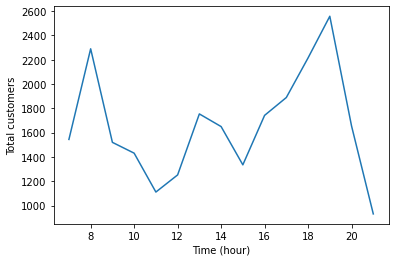

In [50]:
#try_df = data.sort_values(by=['time']).groupby(['location','time'])['customer_id'].agg(['count'])
#df_cust_hour = data.groupby(['hour'])['customer_no'].nunique().reset_index()
df_cust_hour = data.groupby(['hour'])['customer_no'].count().reset_index()
sns.lineplot(data=df_cust_hour, x = 'hour', y = 'customer_no')
plt.xlabel('Time (hour)')
plt.ylabel('Total customers')

In [51]:
df_cust_hour['customer_no'].sum()

24877

#Our business managers think that the first section customers 
#visit follows a different pattern than the following ones. 
#Plot the distribution of customers of their first visited section versus following sections 
#(treat all sections visited after the first as “following”).

In [52]:
data.head(5)

,timestamp,customer_no,location,weekday,day,hour,time,date
0,2019-09-02 07:03:00,1,dairy,Monday,0,7,07:03:00,2019-09-02
1,2019-09-02 07:03:00,2,dairy,Monday,0,7,07:03:00,2019-09-02
2,2019-09-02 07:04:00,3,dairy,Monday,0,7,07:04:00,2019-09-02
3,2019-09-02 07:04:00,4,dairy,Monday,0,7,07:04:00,2019-09-02
4,2019-09-02 07:04:00,5,spices,Monday,0,7,07:04:00,2019-09-02


In [53]:
sorted_df = data.sort_values(['customer_no'])
sorted_df = sorted_df[['customer_no','location','time']]
sorted_df.rename(columns={'location':'current_location','time':'current_time'}, inplace = True)

In [54]:
sorted_df.head(5)

,customer_no,current_location,current_time
0,1,dairy,07:03:00
8,1,checkout,07:05:00
1,2,dairy,07:03:00
12,2,checkout,07:06:00
2,3,dairy,07:04:00


In [55]:
combined_df.head(5)

,date,customer_no,first_location,end_location,entry_time,checkout_time,time_spent
0,2019-09-02,1,dairy,checkout,07:03:00,07:05:00,2.0
1,2019-09-02,2,dairy,checkout,07:03:00,07:06:00,3.0
2,2019-09-02,3,dairy,checkout,07:04:00,07:06:00,2.0
3,2019-09-02,4,dairy,checkout,07:04:00,07:08:00,4.0
4,2019-09-02,5,spices,checkout,07:04:00,07:05:00,1.0


In [56]:
final_df = pd.merge(combined_df,sorted_df,how='right')

In [57]:
final_df.head(3)

,date,customer_no,first_location,end_location,entry_time,checkout_time,time_spent,current_location,current_time
0,2019-09-02,1,dairy,checkout,07:03:00,07:05:00,2.0,dairy,07:03:00
1,2019-09-02,1,dairy,checkout,07:03:00,07:05:00,2.0,checkout,07:05:00
2,2019-09-02,2,dairy,checkout,07:03:00,07:06:00,3.0,dairy,07:03:00


In [58]:
final_df = final_df[['date','customer_no','current_time', 'current_location', 'first_location', 'end_location', 'entry_time','checkout_time', 'time_spent']]

In [59]:
final_df['current_location'].dtypes

dtype('O')

In [60]:
#final_df['next_location'] = final_df['current_location'].shift(-1)
#final_df['next_location'][final_df['current_location'] == 'checkout'] = 'checkout'

In [61]:
#final_df['next_location'] = final_df['next_location'].fillna('checkout')

In [62]:
final_df.head(3)

,date,customer_no,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent
0,2019-09-02,1,07:03:00,dairy,dairy,checkout,07:03:00,07:05:00,2.0
1,2019-09-02,1,07:05:00,checkout,dairy,checkout,07:03:00,07:05:00,2.0
2,2019-09-02,2,07:03:00,dairy,dairy,checkout,07:03:00,07:06:00,3.0


In [63]:
one_minute = datetime.timedelta(minutes = 1)

In [64]:
one_minute

datetime.timedelta(seconds=60)

In [65]:
df_try = final_df.copy()

In [66]:
df_try['current_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['current_time']),1)

/tmp/ipykernel_71150/1935286052.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_try['current_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['current_time']),1)


In [67]:
df_try['checkout_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['checkout_time']),1)

/tmp/ipykernel_71150/3218194848.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_try['checkout_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['checkout_time']),1)


In [68]:
df_try['entry_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['entry_time']),1)

/tmp/ipykernel_71150/1531011808.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_try['entry_time'] = df_try.apply(lambda r : pd.datetime.combine(r['date'],r['entry_time']),1)


In [69]:
df_try.head(5)
df_try.reset_index()

,index,date,customer_no,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent
0,0,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,1,2019-09-02,1,2019-09-02 07:05:00,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,2,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
3,3,2019-09-02,2,2019-09-02 07:06:00,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
4,4,2019-09-02,3,2019-09-02 07:04:00,dairy,dairy,checkout,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
...,...,...,...,...,...,...,...,...,...,...
24872,24872,2019-09-06,9507,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24873,24873,2019-09-06,9508,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24874,24874,2019-09-06,9508,2019-09-06 21:50:00,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
24875,24875,2019-09-06,9509,2019-09-06 21:50:00,drinks,drinks,checkout,2019-09-06 21:50:00,2019-09-06 21:50:00,0.0


In [70]:
df_try['time'] = df_try['current_time']
df_try.index = df_try['time']
df_try.drop(columns = 'time',inplace = True)

In [71]:
df_try

,date,customer_no,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent
time,,,,,,,,,
2019-09-02 07:03:00,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2019-09-02 07:05:00,2019-09-02,1,2019-09-02 07:05:00,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2019-09-02 07:03:00,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2019-09-02 07:06:00,2019-09-02,2,2019-09-02 07:06:00,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2019-09-02 07:04:00,2019-09-02,3,2019-09-02 07:04:00,dairy,dairy,checkout,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
...,...,...,...,...,...,...,...,...,...
2019-09-06 21:48:00,2019-09-06,9507,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
2019-09-06 21:48:00,2019-09-06,9508,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
2019-09-06 21:50:00,2019-09-06,9508,2019-09-06 21:50:00,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0


In [72]:
df_try = df_try.groupby(['customer_no']).resample('min').ffill()
#df_try = df_try.assign(time=df_try.apply(lambda x: pd.date_range(x['current_time'], x['checkout_time'], freq='1min',inclusive="left"), axis=1)).explode('time').reset_index(drop=True)

In [73]:
df_try

date customer_no        current_time  \
customer_no time                                                              
1           2019-09-02 07:03:00  2019-09-02           1 2019-09-02 07:03:00   
            2019-09-02 07:04:00  2019-09-02           1 2019-09-02 07:03:00   
            2019-09-02 07:05:00  2019-09-02           1 2019-09-02 07:05:00   
2           2019-09-02 07:03:00  2019-09-02           2 2019-09-02 07:03:00   
            2019-09-02 07:04:00  2019-09-02           2 2019-09-02 07:03:00   
...                                     ...         ...                 ...   
9508        2019-09-06 21:48:00  2019-09-06        9508 2019-09-06 21:48:00   
            2019-09-06 21:49:00  2019-09-06        9508 2019-09-06 21:48:00   
            2019-09-06 21:50:00  2019-09-06        9508 2019-09-06 21:50:00   
9509        2019-09-06 21:50:00  2019-09-06        9509 2019-09-06 21:50:00   
9510        2019-09-06 21:50:00  2019-09-06        9510 2019-09-06 21:50:00   

                                current_location first_location end_location  \
customer_no time                                                               
1           2019-09-02 07:03:00            dairy          dairy     checkout   
            2019-09-02 07:04:00            dairy          dairy     checkout   
            2019-09-02 07:05:00         checkout          dairy     checkout   
2           2019-09-02 07:03:00            dairy          dairy     checkout   
            2019-09-02 07:04:00            dairy          dairy     checkout   
...                                          ...            ...          ...   
9508        2019-09-06 21:48:00            dairy          dairy     checkout   
            2019-09-06 21:49:00            dairy          dairy     checkout   
            2019-09-06 21:50:00         checkout          dairy     checkout   
9509        2019-09-06 21:50:00           drinks         drinks     checkout   
9510        2019-09-06 21:50:00           spices         spices     checkout   

                                         entry_time       checkout_time  \
customer_no time                                                          
1           2019-09-02 07:03:00 2019-09-02 07:03:00 2019-09-02 07:05:00   
            2019-09-02 07:04:00 2019-09-02 07:03:00 2019-09-02 07:05:00   
            2019-09-02 07:05:00 2019-09-02 07:03:00 2019-09-02 07:05:00   
2           2019-09-02 07:03:00 2019-09-02 07:03:00 2019-09-02 07:06:00   
            2019-09-02 07:04:00 2019-09-02 07:03:00 2019-09-02 07:06:00   
...                                             ...                 ...   
9508        2019-09-06 21:48:00 2019-09-06 21:48:00 2019-09-06 21:50:00   
            2019-09-06 21:49:00 2019-09-06 21:48:00 2019-09-06 21:50:00   
            2019-09-06 21:50:00 2019-09-06 21:48:00 2019-09-06 21:50:00   
9509        2019-09-06 21:50:00 2019-09-06 21:50:00 2019-09-06 21:50:00   
9510        2019-09-06 21:50:00 2019-09-06 21:50:00 2019-09-06 21:50:00   

                                 time_spent  
customer_no time                             
1           2019-09-02 07:03:00         2.0  
            2019-09-02 07:04:00         2.0  
            2019-09-02 07:05:00         2.0  
2           2019-09-02 07:03:00         3.0  
            2019-09-02 07:04:00         3.0  
...                                     ...  
9508        2019-09-06 21:48:00         2.0  
            2019-09-06 21:49:00         2.0  
            2019-09-06 21:50:00         2.0  
9509        2019-09-06 21:50:00         0.0  
9510        2019-09-06 21:50:00         0.0  

[53903 rows x 9 columns]

In [74]:
df_try = df_try.reset_index(level=['time'])

In [75]:
df_try

,time,date,customer_no,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent
customer_no,,,,,,,,,,
1,2019-09-02 07:03:00,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:04:00,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:05:00,2019-09-02,1,2019-09-02 07:05:00,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,2019-09-02 07:03:00,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:04:00,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
...,...,...,...,...,...,...,...,...,...,...
9508,2019-09-06 21:48:00,2019-09-06,9508,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
9508,2019-09-06 21:49:00,2019-09-06,9508,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
9508,2019-09-06 21:50:00,2019-09-06,9508,2019-09-06 21:50:00,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0


In [76]:
df_try.drop(columns = 'current_time',inplace = True)
df_try.head(10)

,time,date,customer_no,current_location,first_location,end_location,entry_time,checkout_time,time_spent
customer_no,,,,,,,,,
1,2019-09-02 07:03:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:04:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
1,2019-09-02 07:05:00,2019-09-02,1,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,2019-09-02 07:03:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:04:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:05:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
2,2019-09-02 07:06:00,2019-09-02,2,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
3,2019-09-02 07:04:00,2019-09-02,3,dairy,dairy,checkout,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0
3,2019-09-02 07:05:00,2019-09-02,3,dairy,dairy,checkout,2019-09-02 07:04:00,2019-09-02 07:06:00,2.0


In [77]:
# to flatten multi-index df
df_try['index'] = range(1, len(df_try) + 1)

In [78]:
df_try.set_index('index',drop = False, inplace = True)

In [79]:
df_try.rename(columns={'time':'current_time'},inplace=True)

In [80]:
df_try

,current_time,date,customer_no,current_location,first_location,end_location,entry_time,checkout_time,time_spent,index
index,,,,,,,,,,
1,2019-09-02 07:03:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,1
2,2019-09-02 07:04:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,2
3,2019-09-02 07:05:00,2019-09-02,1,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,3
4,2019-09-02 07:03:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,4
5,2019-09-02 07:04:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,5
...,...,...,...,...,...,...,...,...,...,...
53899,2019-09-06 21:48:00,2019-09-06,9508,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53899
53900,2019-09-06 21:49:00,2019-09-06,9508,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53900
53901,2019-09-06 21:50:00,2019-09-06,9508,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53901


In [81]:
#df_try = df_try.sort_values(['customer_no','current_time'])

In [82]:
# wrong
#df_try['next_location'] = df_try['current_location'].shift(-1)
#df_try['next_location'][df_try['current_location'] == 'checkout'] = 'checkout'
#df_try[df_try["customer_no"]==9509]

df_try['next_location'] = df_try.groupby('customer_no')['current_location'].shift(-1)
df_try['next_location'] = df_try['next_location'].fillna('checkout')
df_try['next_location'][df_try['current_location'] == 'checkout'] = 'checkout'

/tmp/ipykernel_71150/1733319958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try['next_location'][df_try['current_location'] == 'checkout'] = 'checkout'


In [83]:
df_try.columns

Index(['current_time', 'date', 'customer_no', 'current_location',
       'first_location', 'end_location', 'entry_time', 'checkout_time',
       'time_spent', 'index', 'next_location'],
      dtype='object')

In [84]:
df_try[(df_try['customer_no']==1) | (df_try['customer_no']==2)]

,current_time,date,customer_no,current_location,first_location,end_location,entry_time,checkout_time,time_spent,index,next_location
index,,,,,,,,,,,
1,2019-09-02 07:03:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,1,dairy
2,2019-09-02 07:04:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,2,checkout
3,2019-09-02 07:05:00,2019-09-02,1,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,3,checkout
4,2019-09-02 07:03:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,4,dairy
5,2019-09-02 07:04:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,5,dairy
6,2019-09-02 07:05:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,6,checkout
7,2019-09-02 07:06:00,2019-09-02,2,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,7,checkout


In [85]:
final_df = df_try.copy()

In [86]:
final_df.columns

Index(['current_time', 'date', 'customer_no', 'current_location',
       'first_location', 'end_location', 'entry_time', 'checkout_time',
       'time_spent', 'index', 'next_location'],
      dtype='object')

In [87]:
final_df

,current_time,date,customer_no,current_location,first_location,end_location,entry_time,checkout_time,time_spent,index,next_location
index,,,,,,,,,,,
1,2019-09-02 07:03:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,1,dairy
2,2019-09-02 07:04:00,2019-09-02,1,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,2,checkout
3,2019-09-02 07:05:00,2019-09-02,1,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,3,checkout
4,2019-09-02 07:03:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,4,dairy
5,2019-09-02 07:04:00,2019-09-02,2,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,5,dairy
...,...,...,...,...,...,...,...,...,...,...,...
53899,2019-09-06 21:48:00,2019-09-06,9508,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53899,dairy
53900,2019-09-06 21:49:00,2019-09-06,9508,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53900,checkout
53901,2019-09-06 21:50:00,2019-09-06,9508,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0,53901,checkout


In [88]:
final_df = final_df.reindex(columns=['date', 'customer_no', 'current_time', 'current_location','next_location',
       'first_location', 'end_location', 'entry_time', 'checkout_time',
       'time_spent'])
final_df

,date,customer_no,current_time,current_location,next_location,first_location,end_location,entry_time,checkout_time,time_spent
index,,,,,,,,,,
1,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,2019-09-02,1,2019-09-02 07:04:00,dairy,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
3,2019-09-02,1,2019-09-02 07:05:00,checkout,checkout,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
4,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
5,2019-09-02,2,2019-09-02 07:04:00,dairy,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0
...,...,...,...,...,...,...,...,...,...,...
53899,2019-09-06,9508,2019-09-06 21:48:00,dairy,dairy,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
53900,2019-09-06,9508,2019-09-06 21:49:00,dairy,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0
53901,2019-09-06,9508,2019-09-06 21:50:00,checkout,checkout,dairy,checkout,2019-09-06 21:48:00,2019-09-06 21:50:00,2.0


In [89]:
final_df['entry_time'] = final_df['entry_time']-one_minute

In [90]:
final_df.head(5)

,date,customer_no,current_time,current_location,next_location,first_location,end_location,entry_time,checkout_time,time_spent
index,,,,,,,,,,
1,2019-09-02,1,2019-09-02 07:03:00,dairy,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0
2,2019-09-02,1,2019-09-02 07:04:00,dairy,checkout,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0
3,2019-09-02,1,2019-09-02 07:05:00,checkout,checkout,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0
4,2019-09-02,2,2019-09-02 07:03:00,dairy,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:06:00,3.0
5,2019-09-02,2,2019-09-02 07:04:00,dairy,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:06:00,3.0


In [91]:
entry_df = final_df.groupby('customer_no').first()
entry_df['current_location'] = 'entrance'
entry_df['current_time'] = entry_df['entry_time']
entry_df.head(3)
entry_df.reset_index(inplace=True)
entry_df

,customer_no,date,current_time,current_location,next_location,first_location,end_location,entry_time,checkout_time,time_spent
0,1,2019-09-02,2019-09-02 07:02:00,entrance,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0
1,2,2019-09-02,2019-09-02 07:02:00,entrance,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:06:00,3.0
2,3,2019-09-02,2019-09-02 07:03:00,entrance,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:06:00,2.0
3,4,2019-09-02,2019-09-02 07:03:00,entrance,dairy,dairy,checkout,2019-09-02 07:03:00,2019-09-02 07:08:00,4.0
4,5,2019-09-02,2019-09-02 07:03:00,entrance,checkout,spices,checkout,2019-09-02 07:03:00,2019-09-02 07:05:00,1.0
...,...,...,...,...,...,...,...,...,...,...
7440,9506,2019-09-06,2019-09-06 21:47:00,entrance,checkout,dairy,checkout,2019-09-06 21:47:00,2019-09-06 21:50:00,2.0
7441,9507,2019-09-06,2019-09-06 21:47:00,entrance,dairy,dairy,checkout,2019-09-06 21:47:00,2019-09-06 21:50:00,2.0
7442,9508,2019-09-06,2019-09-06 21:47:00,entrance,dairy,dairy,checkout,2019-09-06 21:47:00,2019-09-06 21:50:00,2.0
7443,9509,2019-09-06,2019-09-06 21:49:00,entrance,checkout,drinks,checkout,2019-09-06 21:49:00,2019-09-06 21:50:00,0.0


In [92]:
full_df = pd.concat([entry_df, final_df],join='outer')
full_df = full_df.sort_values(['customer_no','current_time']).reset_index(drop=True)

In [93]:
full_df = full_df.drop("next_location", axis=1)

In [94]:
full_df.tail(25)

,customer_no,date,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent
61323,9502,2019-09-06,2019-09-06 21:47:00,checkout,fruit,checkout,2019-09-06 21:45:00,2019-09-06 21:47:00,1.0
61324,9503,2019-09-06,2019-09-06 21:46:00,entrance,dairy,checkout,2019-09-06 21:46:00,2019-09-06 21:50:00,3.0
61325,9503,2019-09-06,2019-09-06 21:47:00,dairy,dairy,checkout,2019-09-06 21:46:00,2019-09-06 21:50:00,3.0
61326,9503,2019-09-06,2019-09-06 21:48:00,dairy,dairy,checkout,2019-09-06 21:46:00,2019-09-06 21:50:00,3.0
61327,9503,2019-09-06,2019-09-06 21:49:00,drinks,dairy,checkout,2019-09-06 21:46:00,2019-09-06 21:50:00,3.0
61328,9504,2019-09-06,2019-09-06 21:46:00,entrance,fruit,checkout,2019-09-06 21:46:00,2019-09-06 21:48:00,1.0
61329,9504,2019-09-06,2019-09-06 21:47:00,fruit,fruit,checkout,2019-09-06 21:46:00,2019-09-06 21:48:00,1.0
61330,9504,2019-09-06,2019-09-06 21:48:00,checkout,fruit,checkout,2019-09-06 21:46:00,2019-09-06 21:48:00,1.0
61331,9505,2019-09-06,2019-09-06 21:47:00,entrance,fruit,checkout,2019-09-06 21:47:00,2019-09-06 21:50:00,2.0
61332,9505,2019-09-06,2019-09-06 21:48:00,fruit,fruit,checkout,2019-09-06 21:47:00,2019-09-06 21:50:00,2.0


In [95]:
# modify next location column with correct values based on current location
full_df['next_location'] = full_df['current_location'].shift(-1)

In [96]:
#full_df.head(25)

In [97]:
full_df['next_location'] = full_df['next_location'].fillna('checkout')

In [98]:
full_df['next_location'][full_df['current_location'] == 'checkout'] = 'checkout'

/tmp/ipykernel_71150/2823434325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['next_location'][full_df['current_location'] == 'checkout'] = 'checkout'


In [99]:
#full_df.tail(25)

In [100]:
full_df.to_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/full_df.csv")

In [101]:
full_df.head(5)


,customer_no,date,current_time,current_location,first_location,end_location,entry_time,checkout_time,time_spent,next_location
0,1,2019-09-02,2019-09-02 07:02:00,entrance,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0,dairy
1,1,2019-09-02,2019-09-02 07:03:00,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0,dairy
2,1,2019-09-02,2019-09-02 07:04:00,dairy,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0,checkout
3,1,2019-09-02,2019-09-02 07:05:00,checkout,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:05:00,2.0,checkout
4,2,2019-09-02,2019-09-02 07:02:00,entrance,dairy,checkout,2019-09-02 07:02:00,2019-09-02 07:06:00,3.0,dairy


In [102]:
full_df.groupby('customer_no')['current_location'].last() != 'checkout'

customer_no
1       False
2       False
3       False
4       False
5       False
        ...  
9506     True
9507    False
9508    False
9509     True
9510     True
Name: current_location, Length: 7445, dtype: bool

### Count transitions

In [103]:
#final_df.groupby('first_location')['next_location'].value_counts().unstack()

In [104]:
#final_df.groupby('current_location')['next_location'].value_counts().unstack()

In [105]:
states = pd.DataFrame(full_df, columns=['customer_no','current_time','current_location','next_location'])

In [106]:
states = states.sort_index()

In [107]:
states.head(5)

,customer_no,current_time,current_location,next_location
0,1,2019-09-02 07:02:00,entrance,dairy
1,1,2019-09-02 07:03:00,dairy,dairy
2,1,2019-09-02 07:04:00,dairy,checkout
3,1,2019-09-02 07:05:00,checkout,checkout
4,2,2019-09-02 07:02:00,entrance,dairy


In [108]:
#customid_forced_checkout = np.where(states.groupby('customer_no')['current_location'].last() != 'checkout')

In [109]:
# all customer ids
customerid_all = list(states['customer_no'].unique())
len(customerid_all)

7445

In [110]:
customid_forced_checkout = list(states.groupby('customer_no')['current_location'].last() != 'checkout')
len(customid_forced_checkout)

7445

In [111]:
forced_customid = []
forced_custom_lastrowindex = []
for count, c in enumerate(customid_forced_checkout):
    if c is True:
        count = count-1
        forced_custom_lastrowindex.append(customerid_all[count]+1)
#        forced_customid = count
#        print(f"index of last row without check-out for customer no. {forced_customid} is :{forced_custom_lastrowindex}")
print(forced_custom_lastrowindex)

[1430, 1433, 1437, 1439, 1440, 1441, 1443, 1445, 1446, 1447, 3411, 3422, 5520, 5527, 5528, 5529, 5530, 7527, 7532, 7533, 9494, 9496, 9500, 9503, 9505, 9506, 9509, 9510]


In [112]:
states.groupby('customer_no')['current_location'].last().shape

(7445,)

In [113]:
#states.groupby('customer_no')['current_location'].apply(lambda x: x.value_counts().index[-1]) != 'checkout'

In [114]:
for f in forced_custom_lastrowindex:
    print(states[states['customer_no'] == f])
#    print(states[states.groupby('customer_no')['current_location'].last() == f])

      customer_no        current_time current_location next_location
12116        1430 2019-09-02 21:37:00         entrance         fruit
12117        1430 2019-09-02 21:38:00            fruit         fruit
12118        1430 2019-09-02 21:39:00            fruit         fruit
12119        1430 2019-09-02 21:40:00            fruit         fruit
12120        1430 2019-09-02 21:41:00            fruit         dairy
12121        1430 2019-09-02 21:42:00            dairy         fruit
12122        1430 2019-09-02 21:43:00            fruit         fruit
12123        1430 2019-09-02 21:44:00            fruit         fruit
12124        1430 2019-09-02 21:45:00            fruit         fruit
12125        1430 2019-09-02 21:46:00            fruit         fruit
12126        1430 2019-09-02 21:47:00            fruit         dairy
12127        1430 2019-09-02 21:48:00            dairy         fruit
12128        1430 2019-09-02 21:49:00            fruit      entrance
      customer_no        current_t

In [115]:
#customid_forced_checkout = customid_forced_checkout[0]

In [116]:
#list(customid_forced_checkout)

In [117]:
states[states['customer_no'] == forced_custom_lastrowindex[0]]

,customer_no,current_time,current_location,next_location
12116,1430,2019-09-02 21:37:00,entrance,fruit
12117,1430,2019-09-02 21:38:00,fruit,fruit
12118,1430,2019-09-02 21:39:00,fruit,fruit
12119,1430,2019-09-02 21:40:00,fruit,fruit
12120,1430,2019-09-02 21:41:00,fruit,dairy
12121,1430,2019-09-02 21:42:00,dairy,fruit
12122,1430,2019-09-02 21:43:00,fruit,fruit
12123,1430,2019-09-02 21:44:00,fruit,fruit
12124,1430,2019-09-02 21:45:00,fruit,fruit
12125,1430,2019-09-02 21:46:00,fruit,fruit


In [118]:
for c in forced_custom_lastrowindex:
    print(states[states['customer_no'] == c])
    df = df.append(states[states['customer_no'] == c])
df_force_checkout = df.groupby('customer_no').last()
print(df_force_checkout)

      customer_no        current_time current_location next_location
12116        1430 2019-09-02 21:37:00         entrance         fruit
12117        1430 2019-09-02 21:38:00            fruit         fruit
12118        1430 2019-09-02 21:39:00            fruit         fruit
12119        1430 2019-09-02 21:40:00            fruit         fruit
12120        1430 2019-09-02 21:41:00            fruit         dairy
12121        1430 2019-09-02 21:42:00            dairy         fruit
12122        1430 2019-09-02 21:43:00            fruit         fruit
12123        1430 2019-09-02 21:44:00            fruit         fruit
12124        1430 2019-09-02 21:45:00            fruit         fruit
12125        1430 2019-09-02 21:46:00            fruit         fruit
12126        1430 2019-09-02 21:47:00            fruit         dairy
12127        1430 2019-09-02 21:48:00            dairy         fruit
12128        1430 2019-09-02 21:49:00            fruit      entrance
      customer_no        current_t

/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be r

      customer_no        current_time current_location next_location
12210        1447 2019-09-02 21:49:00         entrance         fruit
12211        1447 2019-09-02 21:50:00            fruit      entrance
      customer_no        current_time current_location next_location
23655        3411 2019-09-03 21:28:00         entrance        drinks
23656        3411 2019-09-03 21:29:00           drinks        drinks
23657        3411 2019-09-03 21:30:00           drinks        drinks
23658        3411 2019-09-03 21:31:00           drinks        drinks
23659        3411 2019-09-03 21:32:00           drinks        spices
23660        3411 2019-09-03 21:33:00           spices        drinks
23661        3411 2019-09-03 21:34:00           drinks        spices
23662        3411 2019-09-03 21:35:00           spices        drinks
23663        3411 2019-09-03 21:36:00           drinks        drinks
23664        3411 2019-09-03 21:37:00           drinks        drinks
23665        3411 2019-09-03 21:38

/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be r

      customer_no        current_time current_location next_location
61241        9494 2019-09-06 21:31:00         entrance         dairy
61242        9494 2019-09-06 21:32:00            dairy        drinks
61243        9494 2019-09-06 21:33:00           drinks        drinks
61244        9494 2019-09-06 21:34:00           drinks        drinks
61245        9494 2019-09-06 21:35:00           drinks        drinks
61246        9494 2019-09-06 21:36:00           drinks        drinks
61247        9494 2019-09-06 21:37:00           drinks        drinks
61248        9494 2019-09-06 21:38:00           drinks         fruit
61249        9494 2019-09-06 21:39:00            fruit         fruit
61250        9494 2019-09-06 21:40:00            fruit         fruit
61251        9494 2019-09-06 21:41:00            fruit         dairy
61252        9494 2019-09-06 21:42:00            dairy         dairy
61253        9494 2019-09-06 21:43:00            dairy        drinks
61254        9494 2019-09-06 21:44

/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(states[states['customer_no'] == c])
/tmp/ipykernel_71150/2110521998.py:3: FutureWarning: The frame.append method is deprecated and will be r

In [119]:
df_force_checkout = df_force_checkout[['current_time','current_location','next_location']]

df_force_checkout['current_location'] = "checkout"
df_force_checkout['next_location'] = "checkout"
#for i in df.index:
#    df.loc[i,'next_location'] = "checkout"
df_force_checkout.head(3)

,current_time,current_location,next_location
customer_no,,,
1430,2019-09-02 21:49:00,checkout,checkout
1433,2019-09-02 21:49:00,checkout,checkout
1437,2019-09-02 21:47:00,checkout,checkout


In [120]:
df_force_checkout = df_force_checkout.reset_index()
df_force_checkout 

,customer_no,current_time,current_location,next_location
0,1430,2019-09-02 21:49:00,checkout,checkout
1,1433,2019-09-02 21:49:00,checkout,checkout
2,1437,2019-09-02 21:47:00,checkout,checkout
3,1439,2019-09-02 21:46:00,checkout,checkout
4,1440,2019-09-02 21:49:00,checkout,checkout
...,...,...,...,...
1525,9506,2019-09-06 21:48:00,checkout,checkout
1526,9507,NaT,checkout,checkout
1527,9508,NaT,checkout,checkout
1528,9509,2019-09-06 21:50:00,checkout,checkout


In [121]:
states = pd.concat([states, df_force_checkout],join='outer')
states = states.sort_values(['customer_no','current_time']).reset_index(drop=True)

In [122]:
states

,customer_no,current_time,current_location,next_location
0,1,2019-09-02 07:02:00,entrance,dairy
1,1,2019-09-02 07:03:00,dairy,dairy
2,1,2019-09-02 07:04:00,dairy,checkout
3,1,2019-09-02 07:05:00,checkout,checkout
4,2,2019-09-02 07:02:00,entrance,dairy
...,...,...,...,...
62873,9509,2019-09-06 21:50:00,drinks,entrance
62874,9509,2019-09-06 21:50:00,checkout,checkout
62875,9510,2019-09-06 21:49:00,entrance,spices
62876,9510,2019-09-06 21:50:00,spices,checkout


In [123]:
states[states["customer_no"]==9421]

,customer_no,current_time,current_location,next_location
62155,9421,2019-09-06 20:27:00,entrance,fruit
62156,9421,2019-09-06 20:28:00,fruit,fruit
62157,9421,2019-09-06 20:29:00,fruit,fruit
62158,9421,2019-09-06 20:30:00,fruit,fruit
62159,9421,2019-09-06 20:31:00,fruit,fruit
62160,9421,2019-09-06 20:32:00,fruit,dairy
62161,9421,2019-09-06 20:33:00,dairy,fruit
62162,9421,2019-09-06 20:34:00,fruit,drinks
62163,9421,2019-09-06 20:35:00,drinks,drinks
62164,9421,2019-09-06 20:36:00,drinks,spices


In [124]:
states.groupby('customer_no')['current_location'].first().unique()

array(['entrance'], dtype=object)

In [125]:
states['next_location'] = states.groupby('customer_no')['current_location'].shift(-1)
states['next_location'] = states['next_location'].fillna('checkout')
states['next_location'][states['current_location'] == 'checkout'] = 'checkout'

/tmp/ipykernel_71150/3336918861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states['next_location'][states['current_location'] == 'checkout'] = 'checkout'


In [126]:
states = states.dropna()

In [127]:
states.to_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/states.csv")

In [128]:
states[states["customer_no"]==9421]

,customer_no,current_time,current_location,next_location
62155,9421,2019-09-06 20:27:00,entrance,fruit
62156,9421,2019-09-06 20:28:00,fruit,fruit
62157,9421,2019-09-06 20:29:00,fruit,fruit
62158,9421,2019-09-06 20:30:00,fruit,fruit
62159,9421,2019-09-06 20:31:00,fruit,fruit
62160,9421,2019-09-06 20:32:00,fruit,dairy
62161,9421,2019-09-06 20:33:00,dairy,fruit
62162,9421,2019-09-06 20:34:00,fruit,drinks
62163,9421,2019-09-06 20:35:00,drinks,drinks
62164,9421,2019-09-06 20:36:00,drinks,spices


### Calculate transition matrix

In [129]:
pd.crosstab(states['current_location'], states['next_location'], normalize=0)

next_location,checkout,dairy,drinks,fruit,spices
current_location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103466,0.736750,0.058569,0.049848,0.051367
drinks,0.215710,0.010899,0.598499,0.087909,0.086983
entrance,0.000000,0.287576,0.153526,0.377435,0.181464
fruit,0.201605,0.095924,0.054847,0.596947,0.050677
spices,0.150685,0.193214,0.163109,0.090953,0.402039


In [130]:
transmatrix_df = states.groupby(['current_location'])['next_location'].value_counts(normalize=True).unstack().reindex(["entrance","dairy", "drinks", "fruit","spices","checkout"])[["dairy", "drinks", "fruit","spices","checkout"]]

In [131]:
transmatrix_df = transmatrix_df.fillna(0)

transmatrix_df

next_location,dairy,drinks,fruit,spices,checkout
current_location,,,,,
entrance,0.287576,0.153526,0.377435,0.181464,0.000000
dairy,0.736750,0.058569,0.049848,0.051367,0.103466
drinks,0.010899,0.598499,0.087909,0.086983,0.215710
fruit,0.095924,0.054847,0.596947,0.050677,0.201605
spices,0.193214,0.163109,0.090953,0.402039,0.150685
checkout,0.000000,0.000000,0.000000,0.000000,1.000000


In [132]:
transmatrix_df = transmatrix_df[transmatrix_df.index != 'checkout']
transmatrix_df

next_location,dairy,drinks,fruit,spices,checkout
current_location,,,,,
entrance,0.287576,0.153526,0.377435,0.181464,0.000000
dairy,0.736750,0.058569,0.049848,0.051367,0.103466
drinks,0.010899,0.598499,0.087909,0.086983,0.215710
fruit,0.095924,0.054847,0.596947,0.050677,0.201605
spices,0.193214,0.163109,0.090953,0.402039,0.150685


In [133]:
transmatrix_df.to_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/transmatrix_df.csv")

In [143]:
transmatrix_df = pd.read_csv("/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/transmatrix_df.csv")

In [144]:
transmatrix_df.set_index('current_location',inplace = True)

In [145]:
transmatrix_df

,entrance,dairy,drinks,fruit,spices,checkout
current_location,,,,,,
entrance,0,0.287576,0.153526,0.377435,0.181464,0.000000
dairy,0,0.736750,0.058569,0.049848,0.051367,0.103466
drinks,0,0.010899,0.598499,0.087909,0.086983,0.215710
fruit,0,0.095924,0.054847,0.596947,0.050677,0.201605
spices,0,0.193214,0.163109,0.090953,0.402039,0.150685
checkout,0,0.000000,0.000000,0.000000,0.000000,1.000000


## Transition Matrix
### --> into dictionary to have probabilities and corresponding locations

In [146]:
import numpy as np
import cv2

In [147]:
transmatrix_df.columns

Index(['entrance', 'dairy', 'drinks', 'fruit', 'spices', 'checkout'], dtype='object')

In [148]:
transmatrix_df.index

Index(['entrance', 'dairy', 'drinks', 'fruit', 'spices', 'checkout'], dtype='object', name='current_location')

In [149]:
a = list(transmatrix_df.columns)
p = {}
for location in transmatrix_df.index:
    p[location] = list(transmatrix_df.loc[location])

In [150]:
a

['entrance', 'dairy', 'drinks', 'fruit', 'spices', 'checkout']

In [151]:
p

{'entrance': [0.0,
  0.28757555406313,
  0.153525856279382,
  0.377434519811954,
  0.181464069845534,
  0.0],
 'dairy': [0.0,
  0.736750309440756,
  0.058568695847868,
  0.049848092719703,
  0.051367165522674,
  0.103465736469],
 'drinks': [0.0,
  0.01089862224964,
  0.598498869010899,
  0.087908698334362,
  0.086983343615053,
  0.215710466790047],
 'fruit': [0.0,
  0.09592382751023,
  0.054847340258105,
  0.596946805162103,
  0.050676739062008,
  0.201605288007554],
 'spices': [0.0,
  0.193214399490284,
  0.163109270468302,
  0.090952532653711,
  0.402038865880854,
  0.150684931506849],
 'checkout': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]}

### Creating Classes (Customer, Supermarket)

In [434]:
layout_image = cv2.imread('/home/garima/Desktop/SpicedAcademy/spiced_projects/repos/random-rose-student-code/week_8/Milestone-week-8/tiles.png')

In [154]:
a

['entrance', 'dairy', 'drinks', 'fruit', 'spices', 'checkout']

In [163]:
LOCATIONS = {
    'entrance' : (1.0, 0.0, 0.0, 0.0, 0.0, 0.0),
    'dairy' : (0.0, 1.0, 0.0, 0.0, 0.0, 0.0),
    'drinks' : (0.0, 0.0, 1.0, 0.0, 0.0, 0.0),
    'fruit' : (0.0, 0.0, 0.0, 1.0, 0.0, 0.0),
    'spices' : (0.0, 0.0, 0.0, 0.0, 1.0, 0.0),
    'checkout' : (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)
}

In [164]:
LOCATIONS

{'entrance': (1.0, 0.0, 0.0, 0.0, 0.0, 0.0),
 'dairy': (0.0, 1.0, 0.0, 0.0, 0.0, 0.0),
 'drinks': (0.0, 0.0, 1.0, 0.0, 0.0, 0.0),
 'fruit': (0.0, 0.0, 0.0, 1.0, 0.0, 0.0),
 'spices': (0.0, 0.0, 0.0, 0.0, 1.0, 0.0),
 'checkout': (0.0, 0.0, 0.0, 0.0, 0.0, 1.0)}

In [179]:
p['dairy']

[0.0,
 0.736750309440756,
 0.058568695847868,
 0.049848092719703,
 0.051367165522674,
 0.103465736469]

In [181]:
np.random.choice(a=a,size=5,p=p[self.state])

array(['dairy', 'dairy', 'spices', 'dairy', 'fruit'], dtype='<U8')

In [247]:
NEW_CUSTOMERS_PER_MINUTE = 1.6 # lambda of poisson distribution

STIMULATION_TIME_MINUTES = 15
#60*15

In [699]:
class Customer:
    '''a single customer that moves through the supermarket
    in a MCMC simulation'''

    def __init__(self, customer_no):
        self.customer = customer_no
        self.cust_name = 'Garima'
        self.state = 'entrance'

    def next_state(self):
        '''Modify the next_state() method to use the transition probability matrix. Consider using random.choices() or np.random.choice()'''
        self.state = np.random.choice(a=a,size=6,p=p[self.state])[0]
#        print(self.state)
#        print(f'{self.cust_name} is going to the {self.state} section.')
        return customer_no, self.state
        

    def is_active(self):
        ''' Detect churned customers. Returns True if the customer has not reached the checkout yet, False otherwise.
        '''
        if self.state == 'checkout':
            return False
        else:
            return True
        
    def __repr__(self):
        '''returns a csv string for that customer
        '''
#        print(f'{self.customer} was in the section {self.state} before.')
        return f'{self.customer}, {self.state}, {self.customer_name}'
    
    @property
    def customer_name(self):
        '''returns the fake generated name of a customer
        '''
        f = Faker()
        self.cust_name = f.name()
 #       print(f'{self.cust_name} is going to the {self.state} section.')
        return self.cust_name
        
        

In [700]:
customer1 = Customer(1)

In [701]:
customer1.customer_name

'April Buchanan'

In [702]:
customer1.is_active

<bound method Customer.is_active of 1, entrance, Susan Clark MD>

In [703]:
customer1.next_state()

(0, 'spices')

In [704]:
customer2 = Customer(2)
customer2.is_active
customer2.next_state()
customer2.customer_name

'Linda Campbell'

In [705]:
STIMULATION_TIME_MINUTES = int(input("enter the number of customers entering in the supermarket: "))

enter the number of customers entering in the supermarket: 12


In [706]:
print(datetime.strptime('07:00','%H:%M').time())

07:00:00


In [713]:
from datetime import datetime
class Supermarket:
    '''manages multiple Customer instances that are currently in the market.
    '''
    def __init__(self, market ="SARIMA"):        
        # a list of Customer objects
        self.customers = []
#        self.name = name
        self.minutes = datetime.strptime('07:00','%H:%M')
        self.last_id = 0
        self.market = market
 #       self.possible_states = 6

    def __repr__(self):
#        return f'Supermarket({self.minutes.time()},{self.customers}, {self.name})'
        return f'Supermarket({self.minutes.time()},{self.customers})'
        
    def print_customers(self):
        '''print all customers with the current time and id in CSV format.'''
    
#        print(f'current time is: {self.current_time}')
        return f'Supermarket("{self.customers}")'
        

    def next_minute(self):
        """propagates all customers to the next state.
        """
        current_time = (self.minutes + timedelta(minutes = 1))
        self.minutes = current_time
        for c in self.customers:
            c.next_state()
            self.print_row(c)

    
    def add_new_customers(self):
        """randomly creates new customers.
        """
        n = np.random.poisson(NEW_CUSTOMERS_PER_MINUTE)
        for i in range(n):
            self.last_id = self.last_id + 1
#            print(f"the id is {self.last_id}")
            cust = Customer(self.last_id)
            self.customers.append(cust)
#            self.print_row(cust)
            self.customer_name = cust.customer_name
#            print(f'the customer name is: {self.customer_name}')
#            self.print_row(cust)
        print(f' printing add_new_customers {self.last_id}, {self.customer_name}')
        return self.last_id, self.customer_name

    def remove_existing_customers(self):
        """removes every customer that is not active any more.
        """
        self.customers = [c for c in self.customers if c.is_active]
        
    def print_row(self, customer):
        "print a row of CSV file"
        row = str(self) + ', ' + str(customer)
        print(row)
    
if __name__ == "__main__":
    s = Supermarket()
    for i in range(STIMULATION_TIME_MINUTES):
        s.next_minute()
        s.add_new_customers()
        s.remove_existing_customers()
print(s)

 printing add_new_customers 2, Gina Hunter
Supermarket(07:02:00,[1, spices, Kayla Johnson, 2, entrance, Brian Smith]), 1, spices, Tara Gutierrez
Supermarket(07:02:00,[1, spices, Kevin Flynn, 2, fruit, Kelly Irwin]), 2, fruit, Amanda Mathews
 printing add_new_customers 3, Jennifer Brown
Supermarket(07:03:00,[1, spices, Samantha Case, 2, fruit, Jacob Armstrong, 3, entrance, Madison Lyons]), 1, spices, Peter Olson
Supermarket(07:03:00,[1, spices, Cynthia Rodriguez, 2, fruit, Denise Ramos MD, 3, entrance, Evelyn Williams]), 2, fruit, Walter Tran
Supermarket(07:03:00,[1, spices, Michael Nelson DVM, 2, fruit, Debbie Williams, 3, fruit, Kevin Velazquez]), 3, fruit, Margaret Padilla
 printing add_new_customers 4, Carolyn Dorsey
Supermarket(07:04:00,[1, fruit, Heather Lee, 2, fruit, Gregory Petty, 3, fruit, Keith Brown, 4, entrance, Kevin Solomon]), 1, fruit, Terry Brown
Supermarket(07:04:00,[1, fruit, Joshua Reed, 2, checkout, Christina Frederick, 3, fruit, Paul Miller, 4, entrance, Mr. Earl M

In [ ]:
customer1= Supermarket(1)
customer1.print_customers()

customers = []
for _ in range(STIMULATION_TIME_MINUTES):
    customers.append(Customer())

In [428]:
customers

[]

# supermarket instance:
simulation = Supermarket(layout_image, customers)

## Execution Part

In [ ]:
if __name__ == "__main__":

    background = np.zeros((500, 700, 3), np.uint8)
    tiles = cv2.imread("tiles.png")

    market = SupermarketMap(MARKET, tiles)

    while True:
        frame = background.copy()
        market.draw(frame)

        # https://www.ascii-code.com/
        key = cv2.waitKey(1)
       
        if key == 113: # 'q' key
            break
    
        cv2.imshow("frame", frame)


    cv2.destroyAllWindows()

    market.write_image("supermarket.png")